Analysis by Christopher Coletta.

For my company forecast I chose UnitedHealth Group, Inc. (ticker symbol: UNH)

* [UNH company website](https://www.uhc.com/)
* [UNH wiki article](https://en.wikipedia.org/wiki/UnitedHealth_Group)
* [Yahoo Finance stock price history](https://finance.yahoo.com/chart/UNH#eyJtdWx0aUNvbG9yTGluZSI6ZmFsc2UsImJvbGxpbmdlclVwcGVyQ29sb3IiOiIjZTIwMDgxIiwiYm9sbGluZ2VyTG93ZXJDb2xvciI6IiM5NTUyZmYiLCJtZmlMaW5lQ29sb3IiOiIjNDVlM2ZmIiwibWFjZERpdmVyZ2VuY2VDb2xvciI6IiNmZjdiMTIiLCJtYWNkTWFjZENvbG9yIjoiIzc4N2Q4MiIsIm1hY2RTaWduYWxDb2xvciI6IiMwMDAwMDAiLCJyc2lMaW5lQ29sb3IiOiIjZmZiNzAwIiwic3RvY2hLTGluZUNvbG9yIjoiI2ZmYjcwMCIsInN0b2NoRExpbmVDb2xvciI6IiM0NWUzZmYiLCJyYW5nZSI6Im1heCJ9)

Table of Contents:

1. <a href="#sect1">Choose Health Insurance Company to Analyze</a>
2. UNH Annual Revenue Analysis
3. UNH Quarterly Revenue Analysis

In [1]:
# Load Python's statistical analysis and data visualization packages:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

# <a name="sect1"> Choose Health Insurance Company to analyze</a>

## Load annual data

Load annual revenue data from 7 publically traded health care insurance companies downloaded from Wharton Compustat:

In [2]:
annual = pd.read_csv(
    'compustat_wharton_healthcare_revenue_ANNUAL.csv', 
    index_col=0, parse_dates=True)

## Ticker Symbols

The ticker symbols for the companies contained in the data set are:

In [3]:
list(annual.columns)

['AET', 'ANTM', 'CI', 'CNC', 'HUM', 'UNH', 'WCG']

## Labels for legend

Make nice labels for scatter plot legend:

In [4]:
names = ['Aetna Inc.', 'Anthem Inc.', 'Cigna Corp.', \
         'Centene Corp.', 'Humana Inc.', 'UnitedHealth Group Inc', \
         'WellCare Health Plans, Inc.']
labels = [ tic + ' - '  + name for tic, name in zip( annual.columns, names) ]

## Make Annual Revenue figure for seven companies

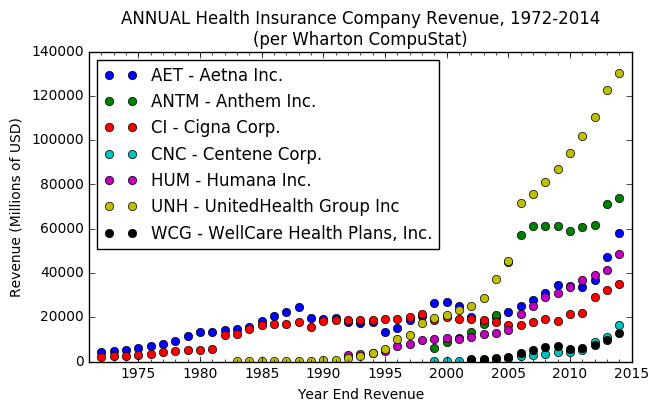

In [5]:
chart_title = "ANNUAL Health Insurance Company Revenue, 1972-2014"
chart_title += "\n(per Wharton CompuStat)"
fig, ax = plt.subplots( figsize=(7,4) )
ax = annual.plot(style="o", ax=ax, legend=False,
    title=chart_title)
ax.set_ylabel( "Revenue (Millions of USD)")
ax.set_xlabel( "Year End Revenue")
ax.set_xlim( ('1971-12-31','2015-12-31') )
ax.legend(labels, loc='upper left')

## Load quarterly data

Downloaded from Wharton CompuStat

In [6]:
quarterly = pd.read_csv(
    'compustat_wharton_healthcare_revenue_QUARTERLY.csv',
    index_col=0, parse_dates=True)

## Make Quarterly Revenue Figure for seven companies

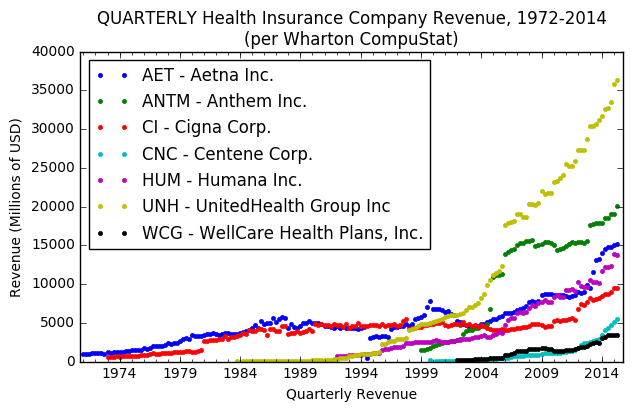

In [7]:
chart_title = "QUARTERLY Health Insurance Company Revenue, 1972-2014"
chart_title += "\n(per Wharton CompuStat)"
fig, ax = plt.subplots( figsize=(7,4) )
ax = quarterly.plot(style=".", ax=ax, legend=False,
    title=chart_title )
ax.set_ylabel( "Revenue (Millions of USD)")
ax.set_xlabel( "Quarterly Revenue")
ax.set_xlim( ('1970-12-31','2015-12-31') )
ax.legend(labels, loc='upper left')

## Selection of company to analyze

UnitedHealth Group generates the most revenue out of the seven, and seems to exhibit the classic quarterly cyclical trend. We zoom in on the latest run starting in 2006.

# UNH Annual Revenue Analysis

## Select start and end dates for model

In [8]:
start_a = '2006-12-31'
end_a = '2014-12-31'
annual_date_range = pd.date_range( start=start_a, end=end_a, freq='A')

## Select data from table and add Period variable for regressor

In [9]:
unh = annual.loc[ annual_date_range, 'UNH'].to_frame( name='Revenue')
period = pd.DataFrame( index=unh.index, data={'Period': range(len(unh))})
unh = pd.merge( unh, period, how='outer',
            left_index=True, right_index=True )

## Review data

In [10]:
unh

,Revenue,Period
2006-12-31,71542.0,0
2007-12-31,75431.0,1
2008-12-31,81186.0,2
2009-12-31,87138.0,3
2010-12-31,94155.0,4
2011-12-31,101862.0,5
2012-12-31,110618.0,6
2013-12-31,122489.0,7
2014-12-31,130474.0,8


## Scatter Plot, UNH Annual revenue

(60000, 140000)

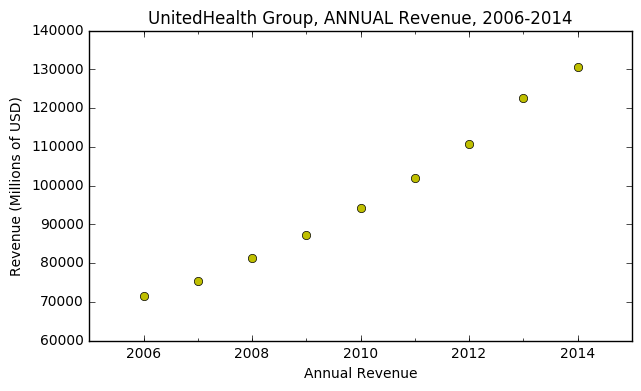

In [11]:
fig, ax = plt.subplots( figsize=(7,4) )
ax = unh['Revenue'].plot(style="yo", ax=ax, legend=False,
    title="UnitedHealth Group, ANNUAL Revenue, 2006-2014" )
ax.set_ylabel( "Revenue (Millions of USD)")
ax.set_xlabel( "Annual Revenue")
ax.set_xlim( ('2005-12-31', '2015-12-31') )
ax.set_ylim( ( 60000, 140000) )

## Create OLS Revenue Model 

In [12]:
model = smf.ols('Revenue ~ Period', data=unh)
results = model.fit()
results.summary()

/usr/local/lib/python2.7/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     362.6
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           2.74e-07
Time:                        12:16:55   Log-Likelihood:                -83.858
No. Observations:                   9   AIC:                             171.7
Df Residuals:                       7   BIC:                             172.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6.718e+04   1877.279     35.785      0.000      6.27e+04  7.16e+04
Period      7508.1667    394.308     19.041      0.000      6575.777  8440.556
==============================================================================
Omnibus:                        2.403   Durbin-Watson:                   0.608
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                0.989
Skew:                           0.365   Prob(JB):                        0.610
Kurtosis:                       1.550   Cond. No.                         9.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluation of Model

R-squared of 0.98! Looks great!

## Use model to project revenue through 2017

In [13]:
dates = pd.date_range( start='2015-12-31', end='2017-12-31', freq='A')
periods = [9, 10, 11]
p = pd.DataFrame( index=dates, data={'Period': periods} )

In [14]:
results.predict(p)

array([ 134751.38888889,  142259.55555556,  149767.72222222])

In [15]:
pred = pd.DataFrame( index=dates, data={'Projected Revenue': list( results.predict( p ) ) } )
p = pd.merge( p, pred, how='outer', left_index=True, right_index=True)

In [16]:
p

,Period,Projected Revenue
2015-12-31,9,134751.388889
2016-12-31,10,142259.555556
2017-12-31,11,149767.722222


## Plot Projected revenue on same graph

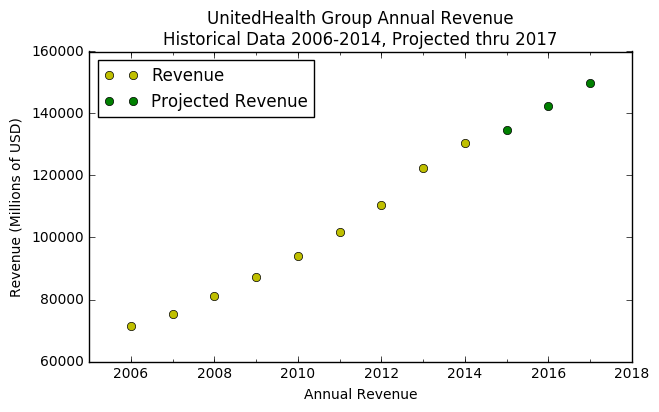

In [17]:
fig, ax = plt.subplots( figsize=(7,4) )
chart_title = "UnitedHealth Group Annual Revenue"
chart_title += '\nHistorical Data 2006-2014, Projected thru 2017'
ax = unh['Revenue'].plot( style="yo", ax=ax, legend=False,
    title=chart_title )
ax = p['Projected Revenue'].plot(style="go", ax=ax, legend=False )
ax.set_ylabel( "Revenue (Millions of USD)")
ax.set_xlabel( "Annual Revenue")
ax.set_xlim( ('2005-12-31', '2018-12-31') )
ax.set_ylim( ( 60000, 160000) )
ax.legend(loc='upper left')

# UNH Quarterly Revenue Analysis

## Select start and end quarters for model

In [18]:
start_q = '2006-03-31'
end_q = '2015-06-30'
dates_q = pd.date_range( start=start_q, end=end_q, freq='Q')

## Select data from table

In [19]:
unh_q = quarterly.loc[ dates_q, 'UNH' ].to_frame('Revenue')

## Scatter Plot of UNH quarterly revenue

(143, 183)

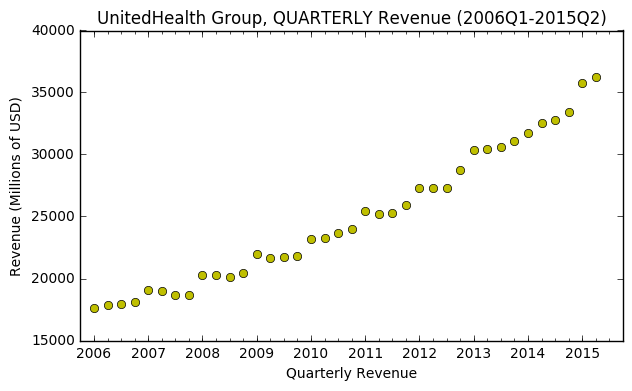

In [20]:
fig, ax = plt.subplots( figsize=(7,4) )
ax = unh_q['Revenue'].plot(style="yo", ax=ax, legend=False,
    title="UnitedHealth Group, QUARTERLY Revenue (2006Q1-2015Q2)" )
ax.set_ylabel( "Revenue (Millions of USD)")
ax.set_xlabel( "Quarterly Revenue")
ax.set_xlim( ('2005-12-31', '2015-12-31') )

## Add quarterly dummy variables

In [21]:
for label, quarter in [('Q1','A-MAR'), ('Q2','A-JUN'), ('Q3','A-SEP')]:
    dates = pd.date_range( start=start_q, end=end_q, freq=quarter)
    dummy = pd.DataFrame( index=dates, data={label:[1]*len(dates)} )
    unh_q = pd.merge( unh_q, dummy, how='outer', left_index=True, right_index=True)
unh_q.fillna(0, inplace=True)
period = pd.DataFrame( index=unh_q.index, data={ 'Period':range(len(unh_q)) } )
unh_q = pd.merge( unh_q, period, how='outer', left_index=True, right_index=True)

## Review quarterly dummy variables

In [22]:
unh_q

,Revenue,Q1,Q2,Q3,Period
2006-03-31,17581.0,1.0,0.0,0.0,0
2006-06-30,17863.0,0.0,1.0,0.0,1
2006-09-30,17970.0,0.0,0.0,1.0,2
2006-12-31,18128.0,0.0,0.0,0.0,3
2007-03-31,19047.0,1.0,0.0,0.0,4
2007-06-30,19000.0,0.0,1.0,0.0,5
2007-09-30,18679.0,0.0,0.0,1.0,6
2007-12-31,18705.0,0.0,0.0,0.0,7
2008-03-31,20304.0,1.0,0.0,0.0,8
2008-06-30,20272.0,0.0,1.0,0.0,9


## Fit OLS Revenue Model to quarterly data

In [23]:
model = smf.ols('Revenue ~ Period + Q1 + Q2 + Q3', data=unh_q)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     318.3
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           7.50e-26
Time:                        12:16:56   Log-Likelihood:                -310.92
No. Observations:                  38   AIC:                             631.8
Df Residuals:                      33   BIC:                             640.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.541e+04    405.102     38.051      0.000      1.46e+04  1.62e+04
Period       488.9145     13.753     35.550      0.000       460.934   516.895
Q1          1049.6145    426.924      2.459      0.019       181.030  1918.199
Q2           675.8000    426.703      1.584      0.123      -192.333  1543.933
Q3            21.9145    438.004      0.050      0.960      -869.211   913.040
==============================================================================
Omnibus:                        2.963   Durbin-Watson:                   0.192
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.685
Skew:                           0.578   Prob(JB):                        0.261
Kurtosis:                       2.399   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluation of Quarterly regression model

R-squared of 0.97?!? How much better could it get??

## Use model to project revenue through 2017

Create a data frame called "p" that has the periods and dummy variables for the projected dates:

In [24]:
predict_startq = '2015-09-30'
predict_endq = '2017-12-31'
dates = pd.date_range( start=predict_startq, end=predict_endq, freq='Q')
p = pd.DataFrame( index=dates, data={ 'Period': range( 38, 38 + len(dates) ) } )
for label, quarter in [('Q1','A-MAR'), ('Q2','A-JUN'), ('Q3','A-SEP')]:
    qdates = pd.date_range( start=predict_startq, end=predict_endq, freq=quarter)
    dummy = pd.DataFrame( index=qdates, data={label:[1]*len(qdates)} )
    p = pd.merge( p, dummy, how='outer', left_index=True, right_index=True)
p.fillna(0, inplace=True)

In [25]:
p

,Period,Q1,Q2,Q3
2015-09-30,38,0.0,0.0,1.0
2015-12-31,39,0.0,0.0,0.0
2016-03-31,40,1.0,0.0,0.0
2016-06-30,41,0.0,1.0,0.0
2016-09-30,42,0.0,0.0,1.0
2016-12-31,43,0.0,0.0,0.0
2017-03-31,44,1.0,0.0,0.0
2017-06-30,45,0.0,1.0,0.0
2017-09-30,46,0.0,0.0,1.0
2017-12-31,47,0.0,0.0,0.0


## Project the results and store them inside "p"

In [26]:
results.predict( p )

array([ 34015.28947368,  34482.28947368,  36020.81842105,  36135.91842105,
        35970.94736842,  36437.94736842,  37976.47631579,  38091.57631579,
        37926.60526316,  38393.60526316])

In [27]:
pred = pd.DataFrame( index=dates, data={'Projected Revenue': list( results.predict( p ) ) } )
p = pd.merge( p, pred, how='outer', left_index=True, right_index=True)

In [28]:
p

,Period,Q1,Q2,Q3,Projected Revenue
2015-09-30,38,0.0,0.0,1.0,34015.289474
2015-12-31,39,0.0,0.0,0.0,34482.289474
2016-03-31,40,1.0,0.0,0.0,36020.818421
2016-06-30,41,0.0,1.0,0.0,36135.918421
2016-09-30,42,0.0,0.0,1.0,35970.947368
2016-12-31,43,0.0,0.0,0.0,36437.947368
2017-03-31,44,1.0,0.0,0.0,37976.476316
2017-06-30,45,0.0,1.0,0.0,38091.576316
2017-09-30,46,0.0,0.0,1.0,37926.605263
2017-12-31,47,0.0,0.0,0.0,38393.605263


## Plot Quarterly Revenue, Historical and Projected thru 2017

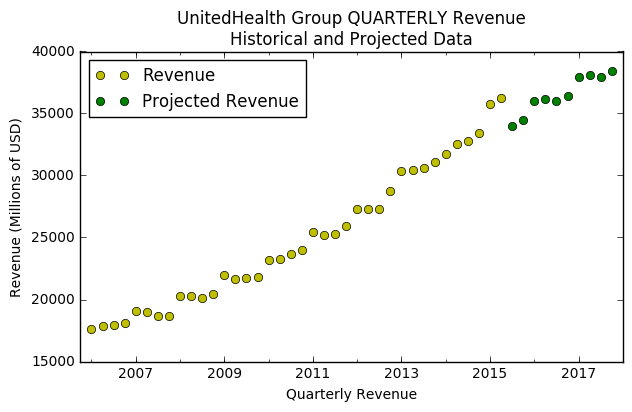

In [29]:
fig, ax = plt.subplots( figsize=(7,4) )
chart_title = "UnitedHealth Group QUARTERLY Revenue"
chart_title += "\nHistorical and Projected Data"
ax = unh_q['Revenue'].plot(style="yo", ax=ax, legend=False,
    title=chart_title )
ax = p['Projected Revenue'].plot(style="go", ax=ax, legend=False )
ax.set_ylabel( "Revenue (Millions of USD)")
ax.set_xlabel( "Quarterly Revenue")
ax.set_xlim( ('2005-12-31', '2018-03-31') )
ax.legend(loc='upper left')

# The End!